In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bykebuyers/bike_buyers.csv


In [3]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
bb = pd.read_csv("../input/bykebuyers/bike_buyers.csv")

# set seed for reproducibility
np.random.seed(0) 

In [4]:
bb.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [5]:
bb.shape

(1000, 13)

In [6]:
#How many missing values do we have?

missing_values_count = bb.isnull().sum()
total_cells = np.product(bb.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.4076923076923077

In [7]:
missing_values_count

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [8]:
#Drop missing values: rows
bb1 = bb.copy()
bb1 = bb1.dropna()
bb1

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [10]:
missing_values_count1 = bb1.isnull().sum()
total_cells1 = np.product(bb1.shape)
total_missing1 = missing_values_count1.sum()
percent_missing1 = (total_missing1/total_cells1) * 100
percent_missing1

0.0

In [11]:
#Rows dropped
missing_values_count1

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [12]:
bb1.shape

(952, 13)

In [13]:
#Drop missing values: columns
sf_permits_with_na_dropped = bb.dropna(axis=1)
cols_in_original_dataset = bb.shape[1]
cols_in_na_dropped = sf_permits_with_na_dropped.shape[1]

dropped_columns = cols_in_original_dataset - cols_in_na_dropped
dropped_columns

7

In [14]:
sf_permits_with_na_dropped
#too many clolumns dropped

,ID,Education,Occupation,Commute Distance,Region,Purchased Bike
0,12496,Bachelors,Skilled Manual,0-1 Miles,Europe,No
1,24107,Partial College,Clerical,0-1 Miles,Europe,No
2,14177,Partial College,Professional,2-5 Miles,Europe,No
3,24381,Bachelors,Professional,5-10 Miles,Pacific,Yes
4,25597,Bachelors,Clerical,0-1 Miles,Europe,Yes
...,...,...,...,...,...,...
995,23731,High School,Professional,2-5 Miles,North America,Yes
996,28672,Graduate Degree,Professional,2-5 Miles,North America,Yes
997,11809,Bachelors,Skilled Manual,0-1 Miles,North America,Yes
998,19664,Bachelors,Management,1-2 Miles,North America,No


In [15]:
#Fill in missing values automatically with the one that comes directly after it and then replacing any remaining NaN's with 0.

bb_with_na_imputed = bb.fillna(method='bfill', axis=0).fillna(0)

In [18]:
bb_with_na_imputed

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,Male,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [16]:
missing_values_count2 = bb_with_na_imputed.isnull().sum()
total_cells2 = np.product(bb_with_na_imputed.shape)
total_missing2 = missing_values_count2.sum()
percent_missing2 = (total_missing2/total_cells2) * 100
percent_missing2

0.0

In [17]:
missing_values_count2

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [19]:
#Normalization Income
#in normalization, you're changing the shape of the distribution of your data. 
#The point of normalization is to change your observations so that they can be described as a normal distribution.
from scipy import stats

# get the index of all positive Income (Box-Cox only takes positive values)
index_of_positive_income = bb.Income > 0

# get only positive Income (using their indexes)
positive_income = bb.Income.loc[index_of_positive_income]

# normalize the Income (w/ Box-Cox)
normalized_income = pd.Series(stats.boxcox(positive_income)[0], 
                               name='Income', index=positive_income.index)

print('Original data\nPreview:\n', positive_income.head())
print('Minimum value:', float(positive_income.min()),
      '\nMaximum value:', float(positive_income.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_income.head())
print('Minimum value:', float(normalized_income.min()),
      '\nMaximum value:', float(normalized_income.max()))

Original data
Preview:
 0    40000.0
1    30000.0
2    80000.0
3    70000.0
4    30000.0
Name: Income, dtype: float64
Minimum value: 10000.0 
Maximum value: 170000.0
______________________________

Normalized data
Preview:
 0    273.637481
1    239.705978
2    376.248892
3    353.879186
4    239.705978
Name: Income, dtype: float64
Minimum value: 144.33786701897859 
Maximum value: 531.5964285829174


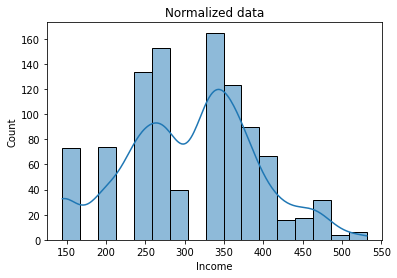

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.histplot(normalized_income, kde=True)
ax.set_title("Normalized data")
plt.show()

In [ ]:
ax = sns.histplot(positive_income, kde=True)
ax.set_title("Input data")
plt.show()

In [ ]:
#Normalization Age
from scipy import stats

# get the index of all positive Income (Box-Cox only takes positive values)
index_of_positive_age = bb.Age > 0

# get only positive Age (using their indexes)
positive_age = bb.Age.loc[index_of_positive_age]

# normalize the Age (w/ Box-Cox)
normalized_age = pd.Series(stats.boxcox(positive_age)[0], 
                               name='Age', index=positive_age.index)

print('Original data\nPreview:\n', positive_age.head())
print('Minimum value:', float(positive_age.min()),
      '\nMaximum value:', float(positive_age.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_age.head())
print('Minimum value:', float(normalized_age.min()),
      '\nMaximum value:', float(normalized_age.max()))

In [ ]:
ax = sns.histplot(normalized_age, kde=True)
ax.set_title("Normalized data")
plt.show()

In [ ]:
ax = sns.histplot(positive_age, kde=True)
ax.set_title("Income data")
plt.show()

In [ ]:
bb1['Income'] = normalized_income
bb1['Age'] = normalized_age

In [ ]:
bb1

In [ ]:
#Result - I suppose, that better to delete rows, because few information in them with NaN. Data imputing is also not bad, but can give incorrect info.
#I'll work with bb1 (no NaN rows).
#Scaling. I'll scale Income column for it. After scaling, all values will lie between 0 and 1.
#in scaling, you're changing the range of your data
display(bb1.Income)
bb1.shape

In [ ]:
from mlxtend.preprocessing import minmax_scaling
original_data = pd.DataFrame(bb1.Income)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['Income'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

In [ ]:
#Scaling Age
original_data_age = pd.DataFrame(bb1.Age)

# scale the goals from 0 to 1
scaled_data_age = minmax_scaling(original_data_age, columns=['Age'])
print('Original data\nPreview:\n', original_data_age.head())
print('Minimum value:', float(original_data_age.min()),
      '\nMaximum value:', float(original_data_age.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data_age.head())
print('Minimum value:', float(scaled_data_age.min()),
      '\nMaximum value:', float(scaled_data_age.max()))

In [ ]:
bb1['Income'] = scaled_data
bb1['Age'] = scaled_data_age

In [ ]:
bb1

In [ ]:
#Some scaled analytics
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.histplot(scaled_data, kde=True)
ax.set_title("Scaled data")
ax = sns.histplot(scaled_data_age, kde=True)
ax.set_title("Scaled data_age_income")
plt.show()

In [ ]:
bb1

In [ ]:
#Test cardinality for one-hot-encoding

low_cardinality_cols = [cname for cname in bb1.columns if bb1[cname].nunique() < 10 and 
                        bb1[cname].dtype == "object"]
low_cardinality_cols

#Result -> they have all low cardinality, we can one-hot them all

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_bb1 = pd.DataFrame(OH_encoder.fit_transform(bb1[low_cardinality_cols]))
OH_bb1.index = bb1.index
#Determine numeric columns
bbnum = bb1.drop(low_cardinality_cols, axis=1)

#Concatinate final dataset
bbfinal = pd.concat([bbnum, OH_bb1], axis=1)
bbfinal

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
grid = sns.pairplot(data=bbfinal, vars=bbfinal.columns[1:5], hue='Children')
plt.show()